In [1]:
#importng libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

dataset=pd.read_csv(r"C:\Machine Learning A-Z Template Folder\titanic dataset\train.csv")
testdata=pd.read_csv(r"C:\Machine Learning A-Z Template Folder\titanic dataset\test.csv")




In [2]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


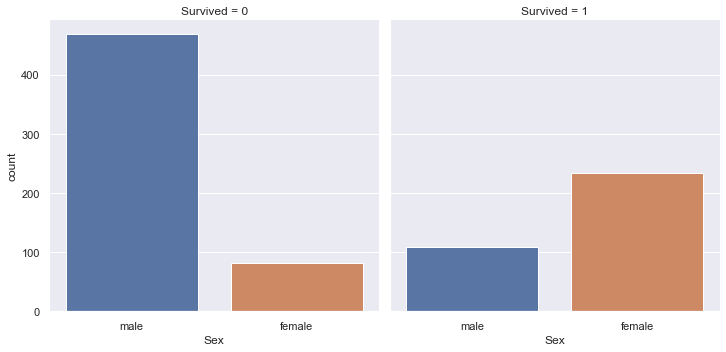

In [4]:
#below are the graphs and plots used for data preprocessing
sns.catplot(x='Sex', col='Survived', kind='count', data=dataset)

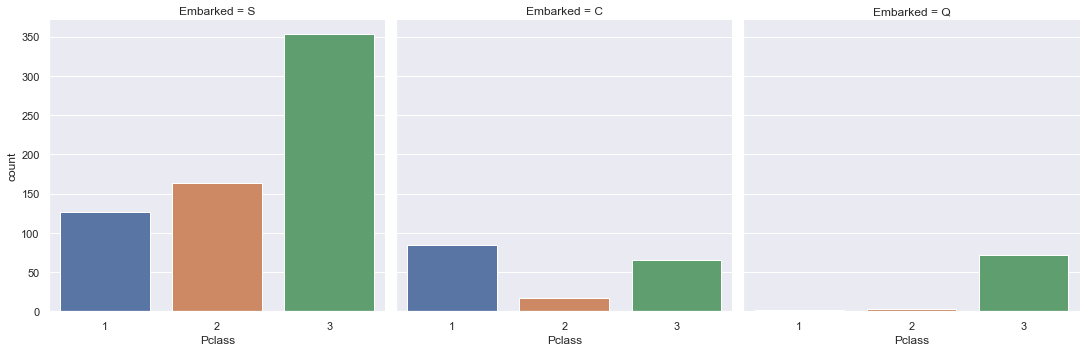

In [5]:
sns.catplot(x='Pclass', col='Embarked', kind='count', data=dataset)

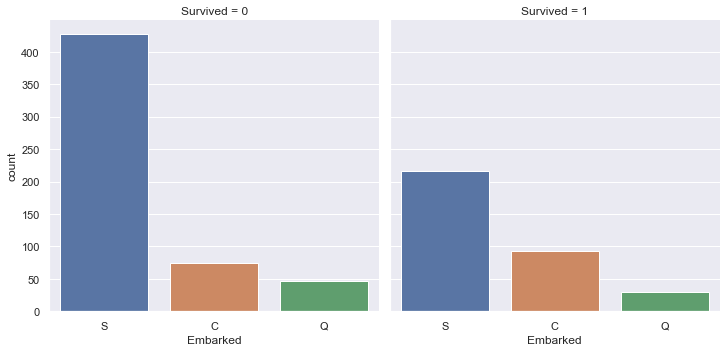

In [6]:
sns.catplot(x='Embarked', col='Survived', kind='count', data=dataset)

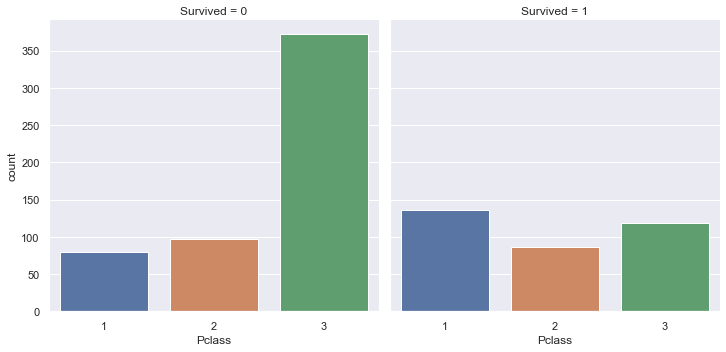

In [7]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=dataset)

C:\Users\prasad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


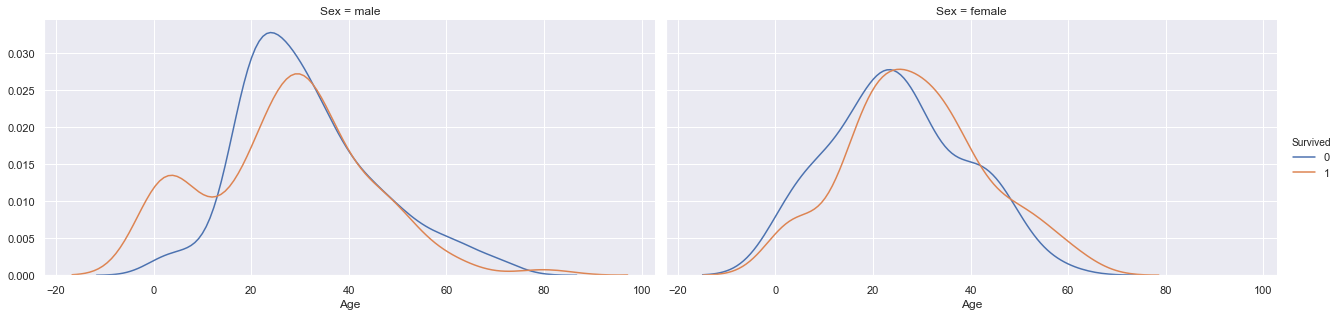

In [8]:
'''facet = sns.FacetGrid(data = dataset,hue="Survived",legend_out=True,size = 4.5,height=6,aspect=2)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();'''

facet = sns.FacetGrid(data = dataset,hue="Survived",col="Sex",legend_out=True,size = 4.5,height=6,aspect=2)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

In [9]:

all_df =pd.concat([dataset,testdata],sort=False)


all_df.isnull().sum()
all_df['Embarked'] = all_df['Embarked'].fillna('C')
all_df['Age']      = all_df['Age'].fillna(all_df['Age'].median())
all_df['Fare']     = all_df['Fare'].fillna(all_df['Fare'].median())
all_df['Cabin']    = all_df['Cabin'].fillna('Z')
all_df['Cabin']    = all_df['Cabin'].apply(lambda x: str(x)[0])

all_df['familysize']=all_df['SibSp']+all_df['Parch']





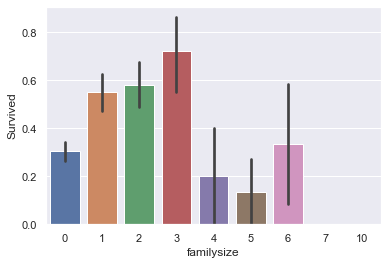

In [10]:
sns.barplot(x='familysize',y='Survived',data=all_df)

In [11]:
#family size is classified into 3 groups
all_df.loc[(all_df.familysize==0),'FamilyType'] = 2
all_df.loc[((all_df.familysize>=1)&(all_df.familysize<=3)),'FamilyType'] = 3
all_df.loc[(all_df.familysize>=4),'FamilyType'] = 1

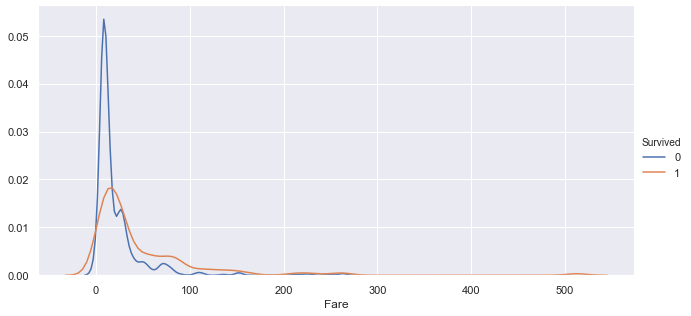

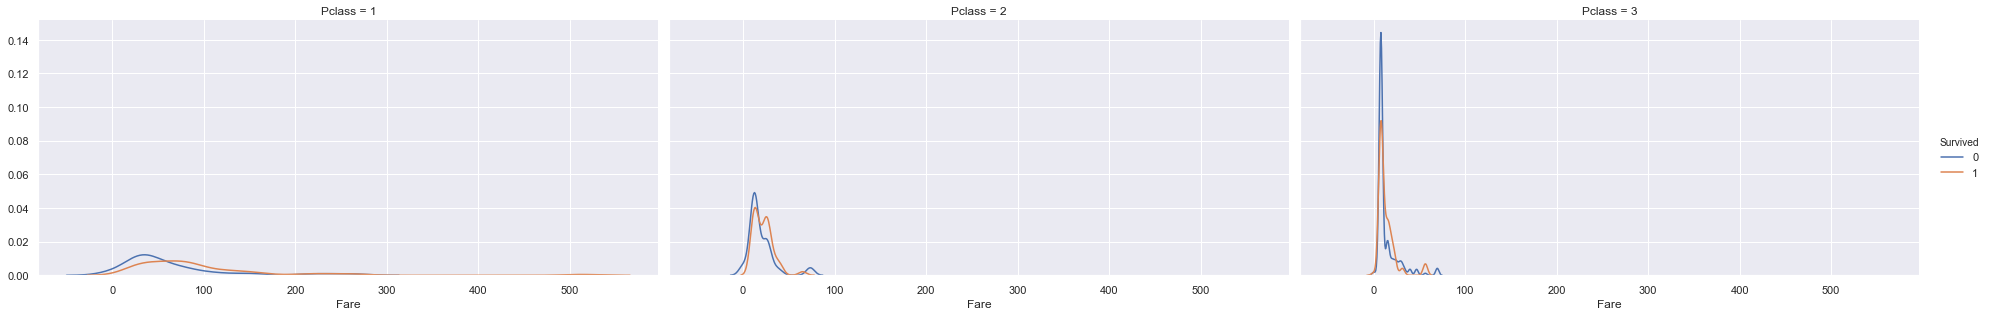

In [12]:
facet = sns.FacetGrid(data = dataset,hue="Survived",legend_out=True,size = 4.5,height=6,aspect=2)
facet = facet.map(sns.kdeplot, "Fare")
facet.add_legend();


facet = sns.FacetGrid(data = dataset,col='Pclass',hue="Survived",legend_out=True,size = 4.5,height=6,aspect=2)
facet = facet.map(sns.kdeplot, "Fare")
facet.add_legend();

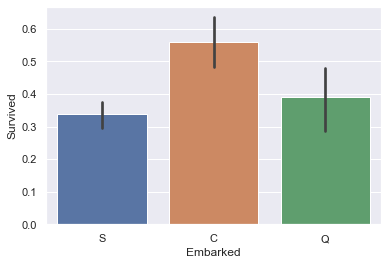

In [13]:
sns.barplot(x='Embarked',y='Survived',data=all_df)

In [14]:

#encoding embarked 
all_df['Embarked']=all_df['Embarked'].map({'S':1,'C':3,'Q':2})


In [15]:

all_df['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:

#sns.barplot(x='Cabin',y='Survived',data=all_df)
all_df['Cabin']=all_df['Cabin'].replace(['E','B','D'],3)
all_df['Cabin']=all_df['Cabin'].replace(['C','F'],2)
all_df['Cabin']=all_df['Cabin'].replace(['A','G','T'],1)
all_df['Cabin']=all_df['Cabin'].replace(['Z'],0)


In [17]:

all_df['Title']=all_df['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
all_df['Title'].unique()


array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

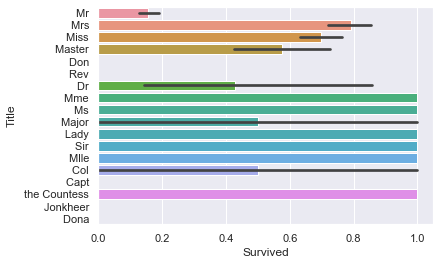

In [18]:
sns.barplot(y='Title',x='Survived',data=all_df)

In [19]:
#encoding title
all_df['Title']=all_df['Title'].astype('str')
all_df['Title']=all_df['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess'],3,regex=True)
all_df['Title']=all_df['Title'].replace(['Mrs','Miss'],2,regex=True)
all_df['Title']=all_df['Title'].replace(['Mr','Master','Dr','Major','Col'],1,regex=True)
all_df['Title']=all_df['Title'].replace(['Don','Rev','Capt','Jonkheer','Dona'],0,regex=True)


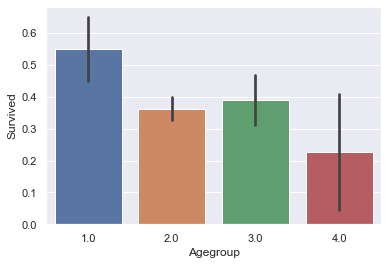

In [20]:

all_df.loc[(all_df.Age<=16),'Agegroup']=1
all_df.loc[(all_df.Age>16)&(all_df.Age<=40),'Agegroup']=2
all_df.loc[(all_df.Age>40)&(all_df.Age<=60),'Agegroup']=3
all_df.loc[(all_df.Age>60),'Agegroup']=4

sns.barplot(x='Agegroup',y='Survived',data=all_df)

all_df['Agecode']=all_df['Agegroup'].map({1:3,2:1,3:2,4:0})

In [21]:
all_df['Sex']=all_df['Sex'].map({'male':0,'female':1})

In [22]:
#sns.barplot(y='Ticket',x='Survived',data=all_df)

len(all_df['Ticket'].unique())
all_df['Cabin']=all_df['Cabin'].astype(int)

In [23]:
finaldataset=all_df.copy()
finaldataset=finaldataset.drop(['PassengerId','Name','Age','SibSp','Parch','Fare','Ticket','familysize','Agegroup'],axis=1)

X = finaldataset.iloc[:,1:].values
y = finaldataset.iloc[:, 0].values

X_train=finaldataset.iloc[:len(dataset),1:].values
X_test=finaldataset.iloc[len(dataset):,1:].values
y_train=finaldataset.iloc[:len(dataset),0].values

In [24]:
#converted the cleaned data to csv files 
#these files are used to apply models in the other py file
X_tr=pd.DataFrame(X_train)
X_tr.to_csv(r"C:\Machine Learning A-Z Template Folder\titanic dataset\X_train.csv")
X_te=pd.DataFrame(X_test)
X_te.to_csv(r"C:\Machine Learning A-Z Template Folder\titanic dataset\X_test.csv")
y_tr=pd.DataFrame(y_train)
y_tr.to_csv(r"C:\Machine Learning A-Z Template Folder\titanic dataset\y_train.csv")


In [25]:
finaldataset.head()

,Survived,Pclass,Sex,Cabin,Embarked,FamilyType,Title,Agecode
0,0.0,3,0,0,1,3.0,1,1
1,1.0,1,1,2,3,3.0,2,1
2,1.0,3,1,0,1,2.0,2,1
3,1.0,1,1,2,1,3.0,2,1
4,0.0,3,0,0,1,2.0,1,1


In [28]:
y_tr.head()

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
